# 4.6.4 [실습] 보팅 앙상블 손글씨 분류

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

## 단일 모델의 정확도 측정

In [3]:
dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8, max_features=32, random_state=35
)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

print("[accuracy]")
print("d-tree: ", accuracy_score(y_test, dtree_predicted))
print("knn   : ", accuracy_score(y_test, knn_predicted))
print("svm   : ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree:  0.8611111111111112
knn   :  0.825
svm   :  0.8416666666666667


## 분류값별 확률 확인

In [4]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.00226505 0.00594303 0.00562542 0.01952584 0.00380531 0.83632702
  0.00196377 0.0051052  0.03869134 0.08074801]
 [0.00305637 0.0153711  0.01365208 0.0107861  0.01149974 0.84243708
  0.00367613 0.01240745 0.05053235 0.0365816 ]]


## 하드 보팅

In [5]:
voting_clf = VotingClassifier(
    estimators=[("decision_tree", dtree), ("Knn", knn), ("svm", svm)],
    weights=[1, 1, 1],
    voting="hard",
).fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9055555555555556

## 소프트 보팅

In [6]:
voting_clf = VotingClassifier(
    estimators=[("decision_tree", dtree), ("Knn", knn), ("svm", svm)],
    weights=[1, 1, 1],
    voting="soft",
).fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9166666666666666

## 단일 모델과 앙상블 모델의 정확도 비교 시각화

([<matplotlib.axis.XTick at 0x22a2fdab1d0>,
 [Text(0, 0, 'decition tree'),
  Text(1, 0, 'knn'),
  Text(2, 0, 'svm'),
  Text(3, 0, 'hard voting'),
  Text(4, 0, 'soft voting')])

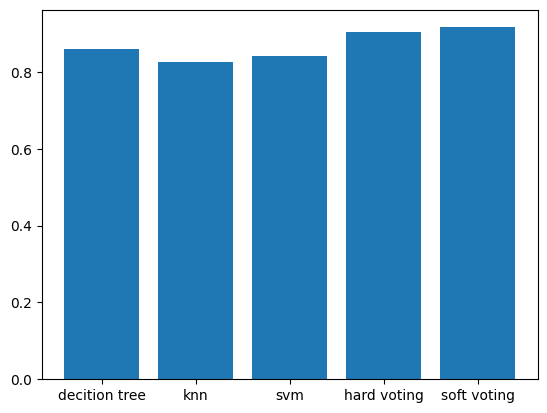

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
plt.bar(
    x,
    height=[
        accuracy_score(y_test, dtree_predicted),
        accuracy_score(y_test, knn_predicted),
        accuracy_score(y_test, svm_predicted),
        accuracy_score(y_test, hard_voting_predicted),
        accuracy_score(y_test, soft_voting_predicted),
    ],
)

plt.xticks(x, ["decition tree", "knn", "svm", "hard voting", "soft voting"])